<a href="https://colab.research.google.com/github/namolk/DES434-project1/blob/main/DES434_project_TangMo_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

In [4]:
df = pd.read_csv('https://github.com/namolk/DES434-project1/raw/main/disney_plus_titles.csv')

In [5]:
#Display basic information about the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1450 entries, 0 to 1449
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       1450 non-null   object
 1   type          1450 non-null   object
 2   title         1450 non-null   object
 3   director      977 non-null    object
 4   cast          1260 non-null   object
 5   country       1231 non-null   object
 6   date_added    1447 non-null   object
 7   release_year  1450 non-null   int64 
 8   rating        1447 non-null   object
 9   duration      1450 non-null   object
 10  listed_in     1450 non-null   object
 11  description   1450 non-null   object
dtypes: int64(1), object(11)
memory usage: 136.1+ KB
None


In [6]:
# View the first few rows of the dataset
print(df.head())

  show_id     type                                             title  \
0      s1    Movie  Duck the Halls: A Mickey Mouse Christmas Special   
1      s2    Movie                            Ernest Saves Christmas   
2      s3    Movie                      Ice Age: A Mammoth Christmas   
3      s4    Movie                        The Queen Family Singalong   
4      s5  TV Show                             The Beatles: Get Back   

                            director  \
0  Alonso Ramirez Ramos, Dave Wasson   
1                        John Cherry   
2                       Karen Disher   
3                    Hamish Hamilton   
4                                NaN   

                                                cast        country  \
0  Chris Diamantopoulos, Tony Anselmo, Tress MacN...            NaN   
1           Jim Varney, Noelle Parker, Douglas Seale            NaN   
2  Raymond Albert Romano, John Leguizamo, Denis L...  United States   
3  Darren Criss, Adam Lambert, Derek Hough

**2. Data Exploration**

In [7]:
release_year_column = df['release_year']

In [8]:
mean = release_year_column.mean()
median = release_year_column.median()
mode = release_year_column.mode().iloc[0]  # Mode might have multiple values, so we take the first one
variance = release_year_column.var()
std_deviation = release_year_column.std()

In [9]:
print(f"Mean: {mean}")
print(f"Median: {median}")
print(f"Mode: {mode}")
print(f"Variance: {variance}")
print(f"Standard Deviation: {std_deviation}")

Mean: 2003.0917241379311
Median: 2011.0
Mode: 2021
Variance: 477.86666714261924
Standard Deviation: 21.860161644933445


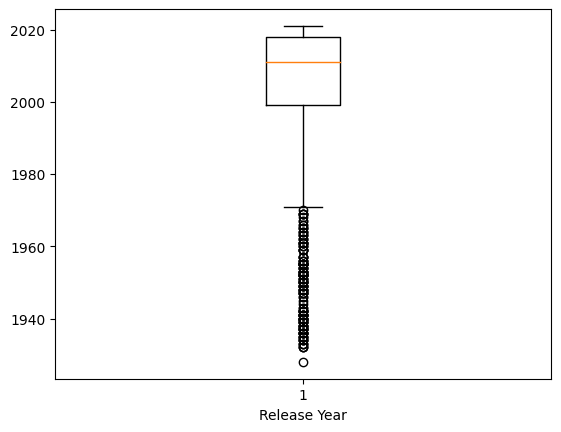

In [10]:
plt.boxplot(df['release_year'])
plt.xlabel('Release Year')
plt.show()

In [11]:
Q1 = release_year_column.quantile(0.25)
Q3 = release_year_column.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = release_year_column[(release_year_column < lower_bound) | (release_year_column > upper_bound)]

In [12]:
cleaned_df = df[~df['release_year'].isin(outliers)]

In [13]:
mean_value = release_year_column.mean()
df['release_year'].loc[outliers.index] = mean_value

<ipython-input-13-0fc82d287a9d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['release_year'].loc[outliers.index] = mean_value


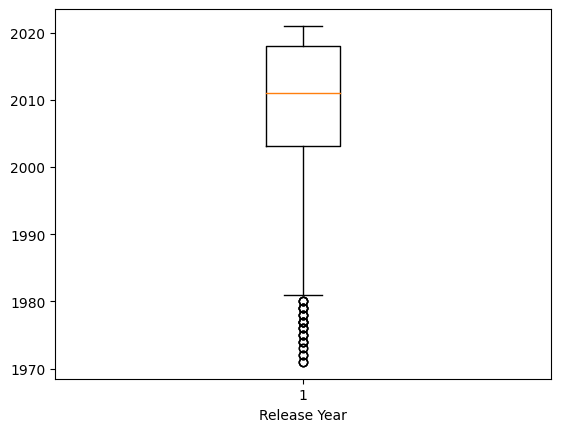

In [14]:
plt.boxplot(df['release_year'])
plt.xlabel('Release Year')
plt.show()

# **3. Statistical Analysis**

Question 1: Is there a significant difference in the average duration (runtime) of content produced in the United States compared to content produced in other countries?

In [49]:
# Separate the dataset into two groups: United States and other countries
us_content = df[df['country'] == 'United States']
other_content = df[df['country'] != 'United States']

In [50]:
# Perform a t-test to compare the average duration of content in the United States and other countries
t_stat, p_value = stats.ttest_ind(us_content['duration'].str.extract('(\d+)').astype(float), other_content['duration'].str.extract('(\d+)').astype(float), equal_var=False)

In [51]:
# Set your significance level (alpha)
alpha = 0.05

In [52]:
# Check the p-value against the significance level
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in content duration.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in content duration.")

Reject the null hypothesis: There is a significant difference in content duration.


Question 2: Is there a relationship between the release year of a title and its IMDb rating?

In [29]:
movies = df[df['type'] == 'Movie']

In [30]:
# Define a mapping of ratings to numerical values
rating_mapping = {
    'G': 1,
    'PG': 2,
    'PG-13': 3,
    'TV-14': 4,
    'TV-G': 5,
    'TV-PG': 6,
    'TV-Y': 7,
    'TV-Y7': 8,
    'TV-Y7-FV': 9
}

In [33]:
# Apply the mapping to create a new numerical rating column
movies['numeric_rating'] = movies['rating'].map(rating_mapping)

<ipython-input-33-7512225b8d66>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies['numeric_rating'] = movies['rating'].map(rating_mapping)


In [34]:
# Remove rows with missing values in either release_year or numeric_rating
movies = movies.dropna(subset=['release_year', 'numeric_rating'])

In [35]:
# Calculate Pearson's correlation coefficient using the cleaned numerical rating column
correlation_coefficient, _ = stats.pearsonr(movies['release_year'], movies['numeric_rating'])

In [36]:
# Check the strength and significance of the correlation
if abs(correlation_coefficient) > 0.2:
    print("There is a significant relationship between release year and IMDb rating.")
else:
    print("There is no significant relationship between release year and IMDb rating.")

There is a significant relationship between release year and IMDb rating.


**1. Probability and Distributions**

- Histograms of Distribution of release year

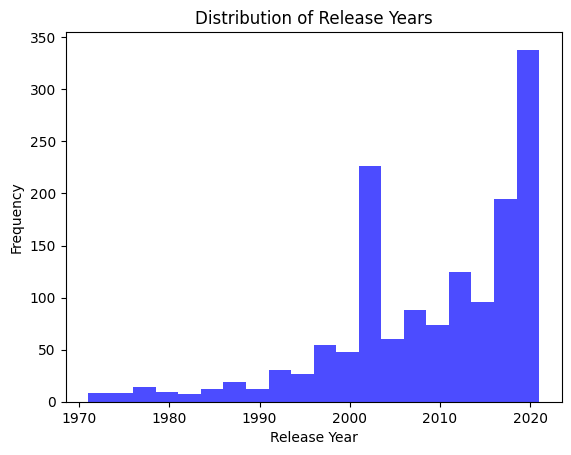

In [44]:
# Plot a histogram of release years
plt.hist(df['release_year'], bins=20, color='blue', alpha=0.7)
plt.xlabel('Release Year')
plt.ylabel('Frequency')
plt.title('Distribution of Release Years')
plt.show()

- Probability Density Estimation (KDE) of release year

<ipython-input-46-e7d99eab0ee5>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['release_year'], shade=True)


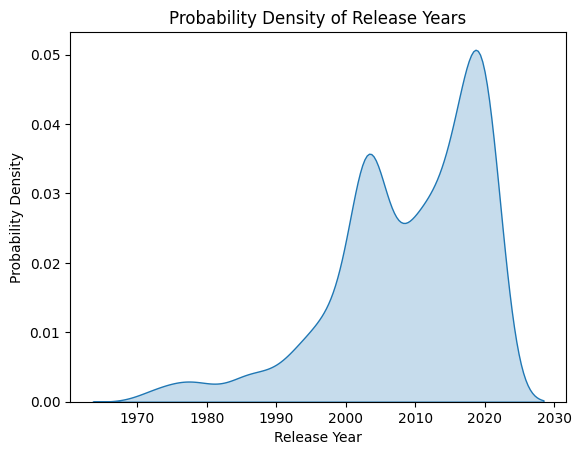

In [46]:
import seaborn as sns

sns.kdeplot(df['release_year'], shade=True)
plt.xlabel('Release Year')
plt.ylabel('Probability Density')
plt.title('Probability Density of Release Years')
plt.show()

- Probability Distributions for content types ('type') and content ratings ('rating')

In [62]:
# Probability distribution for content types ('type')
content_type_distribution = df['type'].value_counts(normalize=True)

# Probability distribution for content ratings ('rating')
content_rating_distribution = df['rating'].value_counts(normalize=True)

# Print the content type distribution
print("Content Type Distribution:")
print(content_type_distribution)

# Print the content rating distribution
print("\nContent Rating Distribution:")
print(content_rating_distribution)

Content Type Distribution:
Movie      0.725517
TV Show    0.274483
Name: type, dtype: float64

Content Rating Distribution:
TV-G        0.219765
TV-PG       0.208017
G           0.174845
PG          0.163096
TV-Y7       0.090532
TV-14       0.054596
PG-13       0.045612
TV-Y        0.034554
TV-Y7-FV    0.008984
Name: rating, dtype: float64


- Measure of Similarity to show "Are there any similar titles based on their descriptions"

In [69]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [70]:
# Create a TF-IDF vectorizer to convert descriptions into numerical vectors
tfidf_vectorizer = TfidfVectorizer()

In [71]:
# Fit and transform the descriptions
tfidf_matrix = tfidf_vectorizer.fit_transform(df['description'])

In [72]:
# Calculate cosine similarity between descriptions
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

In [73]:
# Find the titles that are most similar to a given title (e.g., "Ice Age: A Mammoth Christmas")
title_index = df[df['title'] == 'Ice Age: A Mammoth Christmas'].index[0]
similar_titles = df.iloc[cosine_sim[title_index].argsort()[::-1][1:5]]['title']

In [74]:
print("Titles similar to 'Ice Age: A Mammoth Christmas':")
print(similar_titles)

Titles similar to 'Ice Age: A Mammoth Christmas':
49            The Search for Santa Paws
151               Ice Age: The Meltdown
1178                   Santa's Workshop
1079    Mickey's Twice Upon a Christmas
Name: title, dtype: object


- Title Cosine Similarity

In [61]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Calculate Cosine Similarity between titles
title_vectorizer = CountVectorizer().fit_transform(df["title"])
title_cosine_sim = cosine_similarity(title_vectorizer)

# Print the cosine similarity matrix
print("Cosine Similarity Matrix:")
print(title_cosine_sim)

# Create a probability distribution for content types
content_type_distribution = df["type"].value_counts(normalize=True)

# Print the content type distribution
print("\nContent Type Distribution:")
print(content_type_distribution)

Cosine Similarity Matrix:
[[1.         0.21821789 0.18898224 ... 0.21821789 0.         0.15430335]
 [0.21821789 1.         0.28867513 ... 0.         0.         0.        ]
 [0.18898224 0.28867513 1.         ... 0.         0.         0.        ]
 ...
 [0.21821789 0.         0.         ... 1.         0.         0.23570226]
 [0.         0.         0.         ... 0.         1.         0.        ]
 [0.15430335 0.         0.         ... 0.23570226 0.         1.        ]]

Content Type Distribution:
Movie      0.725517
TV Show    0.274483
Name: type, dtype: float64


# **4. Data Visualization:**

1. Bar Chart: Distribution of Content Types (Movies vs. TV Shows)

In [63]:
# Count the number of movies and TV shows
content_counts = df['type'].value_counts()

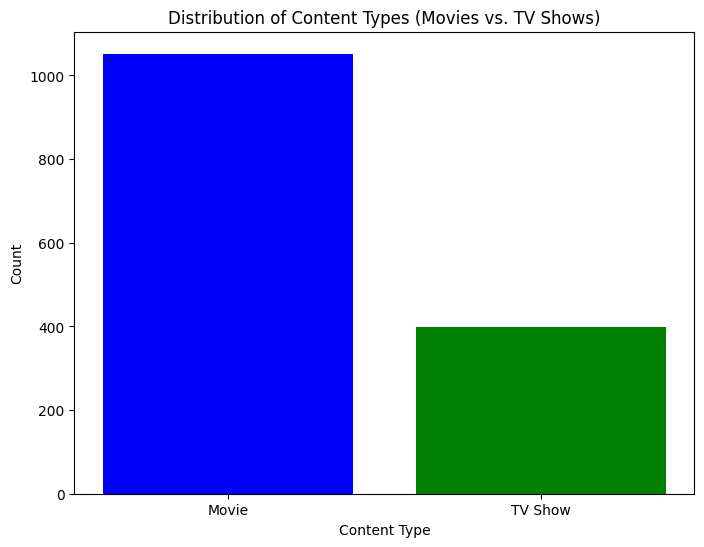

In [64]:
# Create a bar chart
plt.figure(figsize=(8, 6))
plt.bar(content_counts.index, content_counts.values, color=['blue', 'green'])
plt.title('Distribution of Content Types (Movies vs. TV Shows)')
plt.xlabel('Content Type')
plt.ylabel('Count')
plt.show()

2. Pie Chart: Distribution of Content Ratings

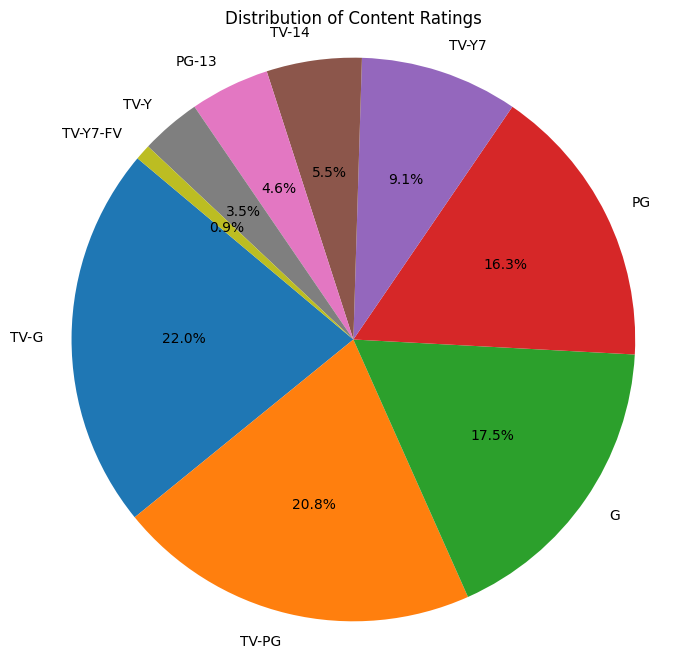

In [65]:
# Count the number of titles for each rating
rating_counts = df['rating'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(rating_counts, labels=rating_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Content Ratings')
plt.axis('equal')
plt.show()

3. Line Chart: Release Year Trends

In [66]:
# Group the data by release year and count the number of titles each year
release_year_counts = df['release_year'].value_counts().sort_index()

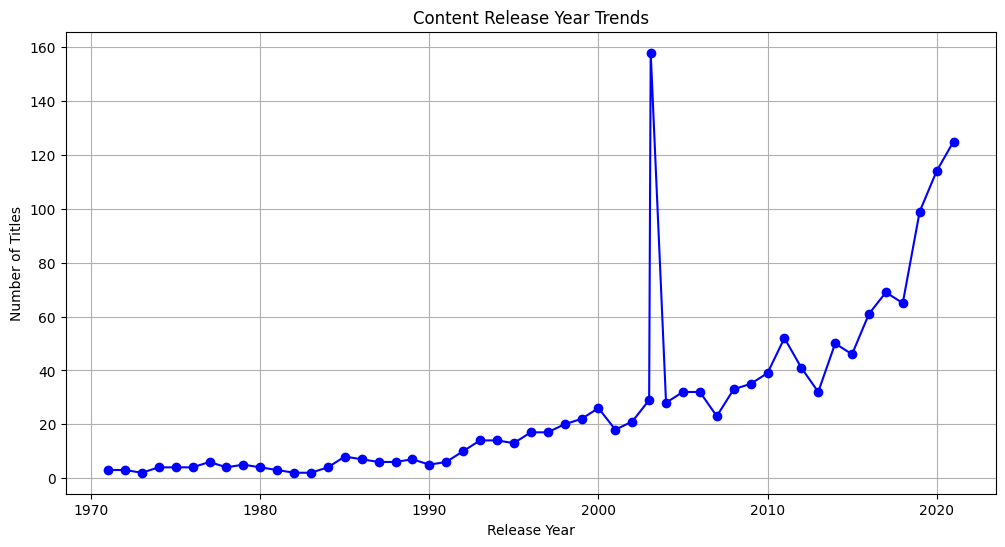

In [67]:
# Create a line chart
plt.figure(figsize=(12, 6))
plt.plot(release_year_counts.index, release_year_counts.values, marker='o', linestyle='-', color='b')
plt.title('Content Release Year Trends')
plt.xlabel('Release Year')
plt.ylabel('Number of Titles')
plt.grid(True)
plt.show()

4. Scatter Plot: Relationship between Release Year and Duration

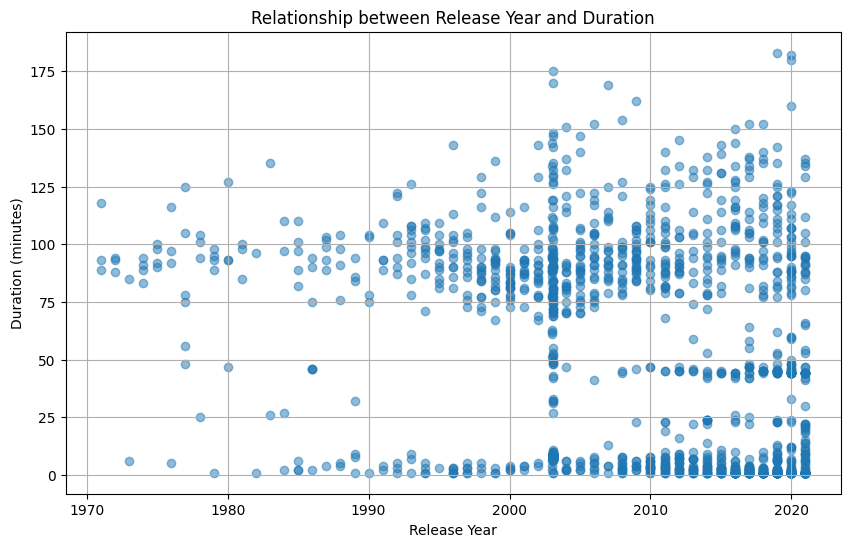

In [68]:
# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['release_year'], df['duration'].str.extract('(\d+)').astype(float), alpha=0.5)
plt.title('Relationship between Release Year and Duration')
plt.xlabel('Release Year')
plt.ylabel('Duration (minutes)')
plt.grid(True)
plt.show()